<a href="https://colab.research.google.com/github/JoDeMiro/SACI22/blob/main/SACI22_019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Források

Kaggle EUR USD Historical Data:
https://www.kaggle.com/imetomi/eur-usd-forex-pair-historical-data-2002-2019

Scikit Learn MLPRegressor:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Itt olyan jó leírások vannak ezt be kelett volna tennem a cikkbe.

### Módosítás a SACI22 - 01.ipynb-hez képest

1. nem feltöltéssel rakom fel az adatot
2. a Github repoból szedi le
3. nem a teljes adatsort, hanem egy rövidített változatot (n < 1110)

### Módosítás a SACI22 - 02.ipynb-hez képest

1. Normalizáció (0,1) helyett (-1,1)-re
2. Az mlp súlyait újra lehet inicializálni az `initializer(mlp, factor)` segítségével.
3. Az mlp első illesztésénél teljesen **random** adatokra illesztek az `y_test` helyett.
4. ezek a listák tárolják az evolúció egyes értékeit (csak elezés céljából)
 - generation_holder = [ ]
 - population_holder = [ ]
 - best_indiv_holder = [ ]
 - best_score_holder = [ ]
   <br>
   ezek a listák tárolják az evolúció egyes értékeit (csak elezés céljából)

### Modósítás a SACI22 - 03.ipynb-hez képest
1. Ez csak egy jó futás - működik. A paraméterek miatt fraction = 25
2. Bevezettem az időmérést
3. Bevezettem a plottolásnál a végtelenűl nagy (értelmezhetetlen értékek) szűrését.
4. Ugyan az mint 03 (013) csak a nagyobb adatokon tesztelgetem, hogy mennyire lassul be.
5.  - **BugFix** (valahol van egy nem kezelt randomizáció) <br>
Az első illesztéshez gyártott random változónál volt egy nem kezelt véletlen.

### Modósítás a SACI22 - 04.ipynb-hez képest
1. Visszatérés a rövid adatokhoz (n=1000)
2. Megcsinálja mind a 10 változóra az időablakot, de nem használom
3. Néhány kiegészítő számítás az adatok méretére a cikkhez.
4. Keep_best solution bevezetése.

### Modósítás a SACI22 - 05.ipynb-hez képest
1. Beletettem egy kíséletet, ahol azt csinálom, hogy folyamatosan növelem a neuronok számát és mérem, hogy mennyivel lessz lassabb a futás.

### Modósítás a SACI22 - 06.ipynb-hez képest
1. Az 1 millió adatot tartalmazó filét olvasom be, jelenleg kísérletezem azzal milyen képeket lehetne betenni a cikkbe.
2. - **BugFix** (a mlp setup batch_size=1, miatt lassú az inicializáló fit - átállítottam max-ra

### Modósítás a SACI22 - 18.ipynb-hez képest
1. - **BugFix** (itt található a pontos leírása annak a jelenségnek, hogy azonos Ranodom Number esetén is miért alakul másképp a tanulás különböző méretű populációkban. Nagyon **Fontos** teoretikus írás, ugyanis a jelenség nem hiba.
2. Elkezdtem átírni az `evaluation` függvényt az `Evaluator` osztályba.
3. - **Nagyon Fontos**  mivel a **SACI22** GitHub Projectet áttettem **Private** elérésbe, ezért ebben a Notebookban az adatokat már a másik GitHub Projectből **SACI2022** olvasom be.

### SACI2022K_001
1. - **BugFix** - A Scikit-learn MLPRegressorban eddig csak a coefs_ értékeket módosítottam. A Bias-hoz tartozó súlyok nem kerültek módosításra. Értéküket az inicializálás (init_nn) után nem változtatták. Ez nagyban meghatározta, hogy milyen eredményt érhettek el. Ezen ebben a Notebookban javítottam.

2. - **BugFix** - A fenti probléma több helyen is előfordult ezért javítását több helyen is el kellett végeznem. Egyrészt a `Randomer` osztályt kellett modosítanom, hogy az `mlp.intercepts_` listán is iteráljon végig és végezze el az értékek modosítását. Másrészt az `Evolver` osztályt kellett módosítanom, hogy a megváltoztatott `mlp.intercept_` lista legyen felül írva, ha jobb megoldást talál a korábbinál.

3. Az `Evolver` osztály `run_evolution` metódusa több változó helyett egy dictionary-t ad vissza.

### SACI2022K_002
1. - Kiszerveztem bionyos osztályokat, hogy átláthatóbb és egyszerűbb legyen a Notebook.:
- - DataReader.py -> `DataReader` Class

2. - Átneveztem számos metodust és változó nevet a DataReader.py modulban és a DataReader osztályban. Ezért a programban is számos helyen át kellett neveznem a függvény és változó neveket.

### Figyelem

Direkt nem neveztem át a Github repoba kerülő file nevét, hogy ne kelljen a kódon változtatnom, de ez a file az eredeti adatoknak csak egy töredékét tartalmazza.

### Help

Egy nagyon jó leírás arról, hogyan kell Pythonban jó docstringet írni.

https://realpython.com/documenting-python-code/

https://www.datacamp.com/tutorial/docstrings-python



## Ez cloud init-be megy majd.

In [1]:
# ------------------------------------------------------------------------------

!mkdir input
# !unzip archive.zip -d input
# !wget https://raw.githubusercontent.com/JoDeMiro/SACI22/main/Input/eurusd_minute_1000000.csv.gz     # <-- saját project
!wget https://raw.githubusercontent.com/JoDeMiro/SACI2022/main/Input/eurusd_minute_1000000.csv.gz     # <-- másik project
!mv eurusd_minute_1000000.csv.gz ./input/
!cd input
!gzip -f -d ./input/eurusd_minute_1000000.csv.gz
!rm ./input/eurusd_minute.csv
!mv ./input/eurusd_minute_1000000.csv ./input/eurusd_minute.csv

# ------------------------------------------------------------------------------

mkdir: cannot create directory ‘input’: File exists
--2022-09-03 17:30:44--  https://raw.githubusercontent.com/JoDeMiro/SACI2022/main/Input/eurusd_minute_1000000.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12887930 (12M) [application/octet-stream]
Saving to: ‘eurusd_minute_1000000.csv.gz’

eurusd_minute_10000 100%[===================>]  12.29M  --.-KB/s    in 0.07s   

2022-09-03 17:30:44 (165 MB/s) - ‘eurusd_minute_1000000.csv.gz’ saved [12887930/12887930]



In [2]:
import os
import sys
import keras
import pprint
import sklearn
import jupyter
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation

print('Python version:{}'.format(sys.version))
print('Numpy version:{}'.format(np.__version__))
print('Pandas version:{}'.format(pd.__version__))
print('Keras version:{}'.format(keras.__version__))
print('Jupyter version:{}'.format(jupyter.__version__))
print('Tensorflow version:{}'.format(tf.__version__))
print('Sci-Kit Learn version:{}'.format(sklearn.__version__))

2022-09-03 17:30:46.611074: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-03 17:30:46.621598: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-03 17:30:46.621628: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Python version:3.8.10 (default, Jun 22 2022, 20:18:18) 
[GCC 9.4.0]
Numpy version:1.21.5
Pandas version:1.3.5
Keras version:2.9.0
Jupyter version:1.0.0
Tensorflow version:2.9.1
Sci-Kit Learn version:1.0.2


In [3]:
print(os.listdir('./input'))

['eurusd_minute.csv']


## Data Reader Class

In [4]:
from DataReader import DataReader

In [5]:
help(DataReader)

Help on class DataReader in module DataReader:

class DataReader(builtins.object)
 |  DataReader(nRowsRead: int)
 |  
 |  DataReader is responsible for holding, store the data and the basic
 |  data manipulation.
 |  
 |  The data flow is the following:
 |  ------------------------------
 |  
 |  csv -> pdf -> dataset -> scaled_dataset -> (x_train, y_train, x_train_reshaped)
 |  
 |  ------------------------------------------------------------------------------
 |  
 |  Attributes
 |  ----------
 |  
 |  nRowsRead : int
 |      the number of rows that is read from the csv
 |  window : int
 |      the number of the lookback period the dataset has (default 10)
 |  dataset : pandas.DataFrame
 |      a dataframe object that stores the data readed from csv
 |  pdf : pd.DataFrame
 |      The data frame which stores the read data from csv file
 |  df : pd.DataFrame
 |      The data frame which stores only Dates and BC values as pandas.series
 |  dataset : pd.DataFrame
 |      The data frame w

## Program

In [6]:
# ------------------------------------------------------------------------------

data_reader = DataReader(nRowsRead=1000)                                        # <-- instantiate DataReader (set number of rows for data)

df2 = data_reader.read_csv(path = './input/eurusd_minute.csv')                  # <-- read a particular files from disk (return with df, but also set self)

data_reader.info_pdf()                                                          # <-- my own info() function

data_reader.pdf.info()                                                          # <-- call pandas built-in info() function

data_reader.create_dataset()                                                    # <-- prepare is setter convert pandas to numpy and set target variable

data_reader.info_dataset()                                                      # <-- my own info_dataset() function

data_reader.scale_dataset()                                                     # <-- transform data between range (-1,1)

data_reader.set_window(2)                                                       # <-- set window size

data_reader.create_training_dataset()                                           # <-- prepare egyik legfontossab metódusa (sok transzformációval)


There are 1000 rows and 12 columns
         Date   Time      BO      BH      BL      BC  BCh      AO      AH  \
0  2005-01-02  18:29  1.3555  1.3555  1.3555  1.3555  0.0  1.3565  1.3565   
1  2005-01-02  18:38  1.3555  1.3555  1.3555  1.3555  0.0  1.3565  1.3565   
2  2005-01-02  18:51  1.3562  1.3562  1.3562  1.3562  0.0  1.3572  1.3572   
3  2005-01-02  18:52  1.3560  1.3560  1.3560  1.3560  0.0  1.3570  1.3570   
4  2005-01-02  18:55  1.3563  1.3563  1.3563  1.3563  0.0  1.3573  1.3573   

       AL      AC  ACh  
0  1.3565  1.3565  0.0  
1  1.3565  1.3565  0.0  
2  1.3572  1.3572  0.0  
3  1.3570  1.3570  0.0  
4  1.3573  1.3573  0.0  
------------------------------------------------------------------------------
Info:
pdf.BC.values.ctypes   =	 <numpy.core._internal._ctypes object at 0x7f39cc508b20>
pdf.BC.values.dtype    =	 float64
pdf.BC.values.itemsize =	 8
pdf.BC.values.nbytes   =	 8000 Byte
pdf.BC.values.nbytes   =	 7.8125 Kbyte
------------------------------------------------

### Check Point

Csak a Jupyter Notebookba kerül be a telepített programba nem.


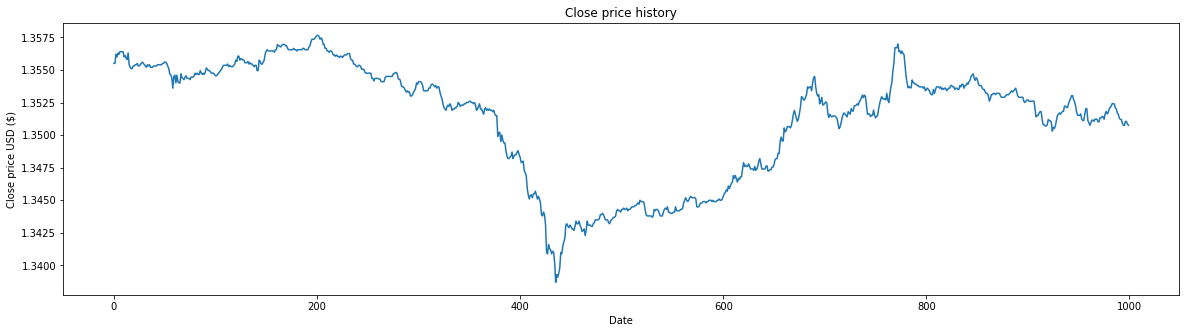

In [8]:
plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.dataset)
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.show()

## NN osztály

Ez egy érdekes állat lesz, mert a **Driver** és a **Worker** is használni fogja.



In [50]:
# ------------------------------------------------------------------------------    # <-- NN Class

# Neural Network Class

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)                                 # <-- kell a Convergencia Warning miatt
simplefilter("ignore")                                                              # <-- a batch_size > n miatt kell ide

import numpy as np
from sklearn.neural_network import MLPRegressor

# ------------------------------------------------------------------------------

class NN():

  def __init__(self, x_train, y_train):
    self.mlp = None
    self.x_train = x_train
    self.y_train = y_train
    self.prediction = None

# ------------------------------------------------------------------------------
  
  def init_nn(self, _first = 15, _second = 5):
    'Init Scikit Learn MLPRegressor'                                                 # <-- hogy létre jöjjenek a súlyok inicializálni kell
    
    np.random.seed(1)

    mlp = MLPRegressor(hidden_layer_sizes=(_first, _second),
                      activation='tanh',                                             # -------> ha (MinMax(-1,1) vagy StandardScaler())
                      solver='sgd',
                      batch_size=100000,                                             # <<-- v.017 bug fixed
                      max_iter=1,                                                    # <-- sajnos legalább 1 kell hogy legyen
                      shuffle=False,
                      random_state=1,
                      learning_rate_init=0.00000001,                                 # >- lehetőleg ne tanuljon semmit GD alapján
                      validation_fraction=0.0,
                      n_iter_no_change=99999999)
    
    # ----->                                                         Behoztam ide az első illesztést is, hogy meglegyenek neki a súlyok

    np.random.seed(1)

    y_random = np.zeros((self.y_train.shape[0])) * 110.01                           # --> tök random adaton tanítom, hogy még véletlenül se tanuljon

    mlp.fit(self.x_train, y_random)                                                 # --> nem akarjuk mi semmire megtanítani csak kell az inithez

    self.mlp = mlp
    
    return mlp

# ------------------------------------------------------------------------------

  def create_prediction(self):
    'Saját adati alapján csinája meg a predcitiont'

    self.prediction = self.mlp.predict(self.x_train)

    return self.prediction


In [51]:
# ------------------------------------------------------------------------------    # <-- NN Class

# Neural Network Keras Class

from sklearn.neural_network import MLPRegressor

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

# ------------------------------------------------------------------------------

class KerasMLP():

  def __init__(self, x_train, y_train):
    self.mlp = None
    self.x_train = x_train
    self.y_train = y_train
    self.prediction = None
    tf.random.set_seed(1)

# ------------------------------------------------------------------------------
  
  def init_nn(self, _first = 15, _second = 5):
    'Init Keras MLP'                                                                 # <-- hogy létre jöjjenek a súlyok inicializálni kell
    
    np.random.seed(1)

    # <--------------------------------- ez az x_train.shape-ből kiolvasható
    _input_shape = 2                                                # <----------------------jaj ennek a window-ból tudni kell az értékét
    _input_shape = self.x_train.shape[1]                            # <----------------------ezzel lesznek gondok, ha majd az indiket is hozzáadom

    mlp = Sequential()
    mlp.add(Dense(_first, input_shape=(_input_shape, ), activation='tanh'))
    mlp.add(Dense(_second, activation='tanh'))
    mlp.add(Dense(1))
    
    # ----->                                                         Behoztam ide az első illesztést is, hogy meglegyenek neki a súlyok

    np.random.seed(1)

    y_random = np.zeros((self.y_train.shape[0])) * 110.01                           # --> tök random adaton tanítom, hogy még véletlenül se tanuljon


    mlp.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=0.0000001),
        # optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000001),       # <------------------ Az Adam legyen SGD elvégre minek de maradhat is ugyse használom
        loss='mean_absolute_error')

    history = mlp.fit(self.x_train,
                      y_random,                                                     # --> y_random és nem self.y_train, hogy véletlen adatokra illeszen
                      epochs=1,
                      shuffle=False,
                      verbose=0,
                      validation_split = 0)

    self.mlp = mlp
    
    return mlp

# ------------------------------------------------------------------------------

  def create_prediction(self):
    'Saját adatai alapján csinája meg a predcitiont'

    self.prediction = self.mlp.predict(self.x_train).flatten()

    return self.prediction


## Program

In [52]:
# ------------------------------------------------------------------------------

# Scikit
nn = NN(x_train = data_reader.x_train, y_train = data_reader.y_train)

nn.init_nn(_first = 15, _second = 5)

# nn.mlp.coefs_                                                                     # <-- ha debuggolni kell

# ------------------------------------------------------------------------------

# Keras
kn = KerasMLP(x_train = data_reader.x_train, y_train = data_reader.y_train)

kn.init_nn(_first = 15, _second = 5)

# kn.mlp.get_weights()                                                              # <-- ha debuggolni kell

# ------------------------------------------------------------------------------

In [53]:
# ------------------------------------------------------------------------------

# Create Prediction Scikit

mlp = nn.init_nn(2, 2)

test_pred = mlp.predict(data_reader.x_train)                                        # teszt pred --> semmire nem fogjuk használni

print(test_pred[0:5])

test_pred = nn.mlp.predict(data_reader.x_train)                                     # init után direktben is el lehet érni az mlp.predict() függvényt

print(test_pred[0:5])

test_pred = nn.create_prediction()                                                  # csináltam neki egy saját fügvényt ami elvégzi az egész predictiont

print(test_pred[0:5])


[-1.17970488 -1.18359979 -1.17930595 -1.18190242 -1.17996159]
[-1.17970488 -1.18359979 -1.17930595 -1.18190242 -1.17996159]
[-1.17970488 -1.18359979 -1.17930595 -1.18190242 -1.17996159]


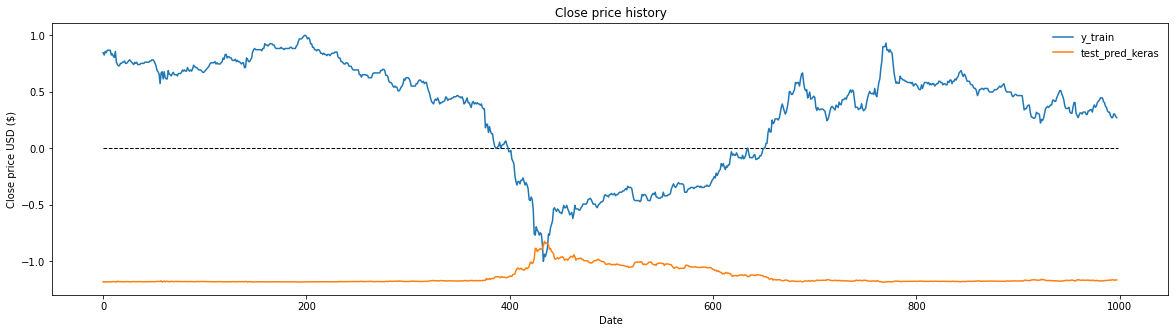

In [54]:
plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.y_train, label = 'y_train')
plt.plot(test_pred, label = 'test_pred_keras')
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.hlines(0.0, 0, data_reader.y_train.size, lw = 1, linestyles='dashed')
plt.legend(frameon=False)
plt.show()

In [55]:
def init_random_seed():
  # Seed value
  # Apparently you may use different seed values at each stage
  seed_value= 0

  # 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
  import os
  os.environ['PYTHONHASHSEED']=str(seed_value)

  # 2. Set the `python` built-in pseudo-random generator at a fixed value
  import random
  random.seed(seed_value)

  # 3. Set the `numpy` pseudo-random generator at a fixed value
  import numpy as np
  np.random.seed(seed_value)

  # 4. Set the `tensorflow` pseudo-random generator at a fixed value
  import tensorflow as tf
  tf.random.set_seed(seed_value)
  # for later versions: 
  # tf.compat.v1.set_random_seed(seed_value)

  # 5. Configure a new global `tensorflow` session
  from keras import backend as K
  # session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  # sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
  # K.set_session(sess)
  # for later versions:
  session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
  sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
  tf.compat.v1.keras.backend.set_session(sess)

In [56]:
# ------------------------------------------------------------------------------

# Create Prediction Keras

# https://www.tensorflow.org/tutorials/keras/regression

init_random_seed()                                                            # ha megismételhető eredményeket akarok

klp = kn.init_nn(2, 2)

test_pred = klp.predict(data_reader.x_train).flatten()                        # a klp objektumon is el lehet érni

test_pred = kn.create_prediction().flatten()                                  # a KerasNN-nek is csináltam egy predict függvényt (ugyan az mint a fenti)

print(test_pred[0:5])


[0.29237607 0.28732395 0.31562397 0.3060854  0.31797543]


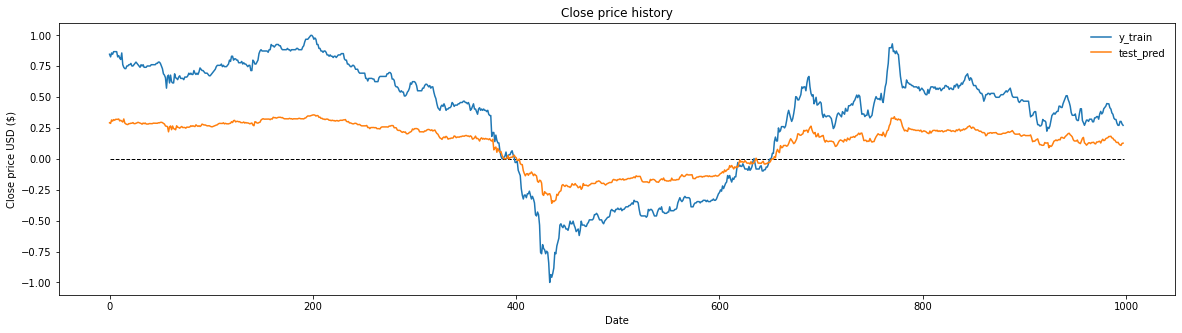

In [57]:
plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.y_train, label = 'y_train')
plt.plot(test_pred, label = 'test_pred')
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.hlines(0.0, 0, data_reader.y_train.size, lw = 1, linestyles='dashed')
plt.legend(frameon=False)
plt.show()

## Trader osztály

In [58]:
# ------------------------------------------------------------------------------    # <-- Trader Class

# Trader Calculator Class

import numpy as np

class Trader():
  """
  Trader Class is responsible for ..
  """

  def __init__(self, threshold, data_reader, debug = False):
    """
    Initialize the class
    :param threshold: Bellow this value the trader sell the security
      Above this value the trader buy the security.
    """
    self.threshold = threshold
    self.data_reader = data_reader
    self.debug = debug
    print('__init__ Trader')

  def calculator(self, pred: np.ndarray) -> dict:
    """
    Calculete each trade on the data. It works as a Backtest Engine.
    :param pred: ndarray Predicted value of the Agent. Based on this the function
      calculates the trades and the Equity.
    """
    buy   = pred > self.threshold
    sell  = pred < self.threshold

    sunique, scounts = np.unique(sell, return_counts=True)
    sell_stat = dict(zip(sunique, scounts))

    bunique, bcounts = np.unique(buy, return_counts=True)
    buy_stat = dict(zip(bunique, bcounts))

    lenght = pred.size

    is_in_trade = False
    is_in_buy = False
    buy_count = 0
    sell_count = 0
    buy_price = []
    sell_price = []
    buy_index = []
    sell_index = []
    for i in range(lenght):
      if buy[i] == True and is_in_trade == False:
        buy_count += 1
        buy_price.append(self.data_reader.y_train[i])
        buy_index.append(i)
        is_in_trade = True
      
      if sell[i] == True and is_in_trade == True:
        sell_count += 1
        sell_price.append(self.data_reader.y_train[i])
        sell_index.append(i)
        is_in_trade = False

      if i == lenght - 1 and is_in_trade == True:                                       # <-- le kell zárni az utolsónál a vételt ha nyitva van
        sell_count += 1
        sell_price.append(self.data_reader.y_train[i])
        sell_index.append(i)
        is_in_trade = False
    
    gains = np.array(sell_price) - np.array(buy_price)
    # print(gains)

    gain = gains.sum()
    # print(gain)

    if (self.debug == True):
      print('Summary :')
      print('buy_stat = ', buy_stat)
      print('sell_stat = ', sell_stat)
      print('buy_count = ', buy_count)
      print('sell_count = ', sell_count)
      print('len(buy_price) = ', len(buy_price))
      print('len(sell_price) = ', len(sell_price))
      print('buy_price  = ', buy_price)
      print('sell_price = ', sell_price)
      print('buy_index  = ', buy_index)
      print('sell_index = ', sell_index)
      # print('gains      = ', gains)
      print('gain       = ', gain)

    self.result = {'buy_price': buy_price, 'sell_price': sell_price, 'buy_index': buy_index, 'sell_index': sell_index}

    result = {'buy_stat': buy_stat.get(True), 'sell_stat': sell_stat.get(True), 'buy_count': buy_count, 'sell_count': sell_count, 'gain': gain}

    return result

## Program

In [59]:
# ------------------------------------------------------------------------------    # <-- Test Trader Class

# Scikit-learn

# ------------------------------------------------------------------------------    # <-- Test Trader Class

new_trader = Trader(threshold = -0.0, data_reader = data_reader)                    # <-- Ebben a formában kell majd használni


pred = nn.create_prediction()

print(pred[0:5])

result = new_trader.calculator(pred)                                                # <-- Ebben a formában kell majd használni

result.keys()                           # <- get dict.keys
result.get('gain')                      # <- get a value by a given key
result['gain']                          # <- get a value by a given key             # <-- Ebben a formában kell majd használni

# ------------------------------------------------------------------------------    # <-- Test has successed


# A Trader osztályon még számos kereskedési eredményt lehet hadsznlni,
# de ezeket most nem használom. Ha érdekel akkor a SACI22 - 018.ipynb
# fájlban meg lehet találni


# ------------------------------------------------------------------------------



__init__ Trader
[-1.17970488 -1.18359979 -1.17930595 -1.18190242 -1.17996159]


0.0

In [60]:
# ------------------------------------------------------------------------------    # <-- Test Trader Class

# Keras

# ------------------------------------------------------------------------------    # <-- Test Trader Class

new_trader = Trader(threshold = -0.0, data_reader = data_reader)                    # <-- Ebben a formában kell majd használni


pred = kn.create_prediction()

print(pred[0:5])

result = new_trader.calculator(pred)                                                # <-- Ebben a formában kell majd használni

result.keys()                           # <- get dict.keys
result.get('gain')                      # <- get a value by a given key
result['gain']                          # <- get a value by a given key             # <-- Ebben a formában kell majd használni

# ------------------------------------------------------------------------------    # <-- Test has successed


# A Trader osztályon még számos kereskedési eredményt lehet hadsznlni,
# de ezeket most nem használom. Ha érdekel akkor a SACI22 - 018.ipynb
# fájlban meg lehet találni


# ------------------------------------------------------------------------------



__init__ Trader
[0.29237607 0.28732395 0.31562397 0.3060854  0.31797543]


-0.7335092348284888

## Randomer osztály

In [61]:
# Kíváncsiságból : A két megoldás súlyai vajon azonos formában vannak?

print(type(nn))
print(type(kn))

print(type(nn.mlp))
print(type(kn.mlp))

print(type(nn.mlp.coefs_))
print(type(kn.mlp.get_weights()))

print(len(nn.mlp.coefs_))
print(len(kn.mlp.get_weights()))

<class '__main__.NN'>
<class '__main__.KerasMLP'>
<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
<class 'keras.engine.sequential.Sequential'>
<class 'list'>
<class 'list'>
3
6


In [62]:
# Na hát igen itt van egy kis különbség.

# A Scikit két külön változóban és listában tárolja a dolgokat
# Egyet a coefs_ és egyet az intercepts_ változóban.

# Ezzel szemben a Keras a .get_weights() függvényen keresztül
# nyújt hozzáférést a súlyokhoz és egy listában van


print('<------------- Scikit mlp.coefs_')
for i in nn.mlp.coefs_:
  print(i)

print('<-------------- Scikit mlp.intercepts_')

for i in nn.mlp.intercepts_:
  print(i)

print('<-------------- Keras model.get_weights()')

for i in kn.mlp.get_weights():
  print(i)

<------------- Scikit mlp.coefs_
[[-0.20325375  0.53968259]
 [-1.22446471 -0.48418434]]
[[-0.76850238 -0.37829743]
 [-0.252867    0.09508118]]
[[-0.83593526]
 [ 1.06947763]]
<-------------- Scikit mlp.intercepts_
[-0.86526782 -0.99856243]
[-0.19793222  0.45369328]
[-1.33674973]
<-------------- Keras model.get_weights()
[[-0.50955397 -0.7187625 ]
 [ 0.08669011  0.15005   ]]
[8.496851e-07 3.143578e-07]
[[ 0.1357357 -0.68269  ]
 [ 0.8938795  0.6792034]]
[ 1.2361709e-06 -1.1002460e-06]
[[-0.8620647 ]
 [ 0.67931235]]
[-1.6249999e-06]


In [63]:
# ------------------------------------------------------------------------------    # <-- Randomer Class

# Segítség

# Korábban ezt már elég jól megírtam, itt taláható a kód
# https://github.com/JoDeMiro/DeepLearningIntroduction/blob/main/Fun_with_NeuralNet_Part_2.ipynb

# Randomer Class

from numpy.random import RandomState
from copy import deepcopy
import numpy as np

class Randomer():

  def __init__(self, _seed):
    self.seed = _seed
    self.prng = RandomState(1234567890)
    self.debug = False
    self.counter = 0

  def randomize_intercepts(self, intercepts, factor = 1000):
    'Get an MLPRegresson, takes its .intercepts_ and randomize'
    _factor = factor
    _intercepts = deepcopy(intercepts)
    for i in range(len(intercepts)):

      modifier = (self.prng.randn(intercepts[i].shape[0]) / factor)
      _intercepts[i] = intercepts[i] + modifier                                     # <-- add new random values to the intercepts (all at once)

    return _intercepts


  def randomize(self, coefs, factor = 1000):
    'Get an MLPRegressor, takes its .coefs_ and randomize'
    self.counter += 1
    _factor = factor
    _coefs = deepcopy(coefs)
    for i in range(len(coefs)):

      modifier = (self.prng.randn(coefs[i].shape[0], coefs[i].shape[1]) / _factor)  # <-- create new random values N(0,1)/factor

      if (self.debug == True):
        print('# ------- c =', self.counter, '------------')
        print('# ------- i =', i, 'layer --------')
        print('------- MODIFIER -------')
        print(modifier)
        print('------- COEFS ---------')
        print(coefs[i])

      _coefs[i] = coefs[i] + modifier                                               # <-- add new random values to the weights (all at once)

      if (self.debug == True):
        print('------- MOD COEFS -----')
        print(_coefs[i])

      # _coefs[i] = coefs[i]                                                        # <-- ha nem akarom módosítani akkor legye egyszerűen csak ez

    return _coefs


In [64]:
print(len(nn.mlp.intercepts_))
print(nn.mlp.intercepts_[0])
print(nn.mlp.intercepts_[1])
print(nn.mlp.intercepts_[2])

3
[-0.86526782 -0.99856243]
[-0.19793222  0.45369328]
[-1.33674973]


## Program

In [65]:
# ------------------------------------------------------------------------------    # <-- Test The Program

from sys import maxsize
import time

trader = Trader(threshold = -1.0, data_reader = data_reader)                        # <-- create a Trader (0.0 just a random choise)

randomer = Randomer(1)                                                              # <-- create a Randomer to controll the mutation


generation = 200                                                                    # <----------- genetration (200)
population = 5                                                                      # <----------- population  (10)
factor = 10                                                                         # <----------- randomization factor (25) (10)
factor_intercept = 1000                                                             # <----------- randomization factor for intercepts_
keep_best = True                                                                    # <----------- keep_best (False)
print_generation = (False, 1)                                                       # <----------- hiba kereséshez



print('--------- init_nn() ----------')
print('mlp.coefs_[0][0]')
print( mlp.coefs_[0][0])
print('mlp.intercepts_[0]')
print( mlp.intercepts_[0])


# ----------------------------------- Azt hiszem az egészre már csináltam egy új osztályt de most ezt leteszteljük



start_time = time.time()

coefs = deepcopy(mlp.coefs_)
intercepts = deepcopy(mlp.intercepts_)

backup_mlp = deepcopy(mlp)
working_mlp = deepcopy(mlp)

best_generation_score = -maxsize
best_generation_solution = None

generation_holder = []
population_holder = []
best_indiv_holder = []
best_score_holder = []

for i in range(generation):                                                         # <-- generation part
  best_individual_solution = None
  best_individual_score = best_generation_score

  population_holder = []
  best_indiv_holder = []

  for j in range(population):                                                       # <-- population part
    if( keep_best == True ):
      if( j == 0 ):
        a = coefs
        b = intercepts
        # pass
      else:
        a = randomer.randomize(coefs, factor=factor)                                # <-- randomizálja a súlyokat (bug)
        b = randomer.randomize_intercepts(intercepts, factor=factor_intercept)
    else:
      a = randomer.randomize(coefs, factor=factor)                                  # <-- randomizálja a súlyokat (bug)
      b = randomer.randomize_intercepts(intercepts, factor=factor_intercept)
    # --> vége a súlymutációnak
    
    working_mlp.coefs_ = a                                                          # <-- assigne randomized coefs to the working_model
    working_mlp.intercepts_ = b                                                     # <-- assigne randomized intc to the working_model

    # számolja ki a becslést
    pred = working_mlp.predict(data_reader.x_train)

    # mérje vissza a hibát, számolja ki a keresekedéseket
    result = trader.calculator(pred)                                                # <-- le kell kezelni azt ha nincs kötés
    if result['buy_count'] != 0:
      score = result['gain']                                                        # <-- csak akkor kapja meg az értéket ha volt vétel
    else:
      score = -maxsize                                                              # <-- egyébkként -maxsize (-9223372036854775807)

    # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
    if( score > best_individual_score ):                                            # mivel maximalizálni akarunk ezért 'score > best_score'
      best_individual_score = score
      best_individual_solution = deepcopy(working_mlp)
      print('new best_solution find individual = ', j)
      print('i =', i, 'j =', j, '\tscore = ', score)
    
    # az éppen aktuális egyed score értékét tegyük el
    population_holder.append(score)
  
  # generációnként tároljuk le a legjobb egyed score érétkét
  best_score_holder.append(best_individual_score)

  # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
  generation_holder.append(population_holder)

  if( print_generation[0] ):
      if( i % print_generation[1] == 0 ):
        print('best_score in generation i = ', i, ' = ', best_individual_score)

  # ha a generáció legjobbja jobb mint a korábbi generáció legjobbja akkor csapja felül
  if ( best_individual_score > best_generation_score ):
    best_generation_score = best_individual_score
    best_generation_solution = deepcopy(best_individual_solution)
    found_better_in_generation = True
    # A generáció legjobbját tegyük le a coef változóba -> ezáltal a következő generációban ő lesz az ami alapján elindul a mutáció
    coefs = deepcopy(best_generation_solution.coefs_)
    intercepts = deepcopy(best_generation_solution.intercepts_)

    print('best_score in generation i = ', i, ' = ', best_individual_score)



# A globalisan legjobb megoldás alapján csináljuk meg a becslést
test_pred = best_generation_solution.predict(data_reader.x_train)                               # <-- kiértékeléshez és vizualizációhoz

# A backup_mlp alapján kiszámolhatom, hogy imlyen volt a becslés eredetileg
test_pred_initial = backup_mlp.predict(data_reader.x_train)                                     # > ha később össze akarom vetni valamelyik mutációval


# Ezek kellenek a plottoláshoz
# generation_holder, best_score_holder, best_generation_solution

# Mérjük meg, hogy mennyi ideig fut
running_time = time.time() - start_time
print('running_time = {:.2f}'.format(running_time))




__init__ Trader
--------- init_nn() ----------
mlp.coefs_[0][0]
[-0.20325375  0.53968259]
mlp.intercepts_[0]
[-0.86526782 -0.99856243]
new best_solution find individual =  0
i = 0 j = 0 	score =  0.3271767810026631
best_score in generation i =  0  =  0.3271767810026631
new best_solution find individual =  1
i = 5 j = 1 	score =  0.43271767810028905
best_score in generation i =  5  =  0.43271767810028905
new best_solution find individual =  2
i = 18 j = 2 	score =  0.4749340369393451
best_score in generation i =  18  =  0.4749340369393451
new best_solution find individual =  1
i = 59 j = 1 	score =  0.5984168865435038
best_score in generation i =  59  =  0.5984168865435038
new best_solution find individual =  4
i = 127 j = 4 	score =  0.6121372031662418
best_score in generation i =  127  =  0.6121372031662418
running_time = 2.93


In [66]:
# ------------------------------------------------------------------------------

# Meg kell tudnom oldani, hogy a legjobb megoldás alapján újra tudjam játszani a kötéslistát

# https://docs.python.org/3/library/typing.html

replayed_pred = best_generation_solution.predict(data_reader.x_train)               # <-- mlp.predict(data_reader.x_train)
replayed_result = trader.calculator(replayed_pred)                                  # <-- trader.calculator(predicted)

print(replayed_result)

detailed_result = trader.result

# print(detailed_result)

# pprint.pprint(detailed_result)

# ------------------------------------------------------------------------------

{'buy_stat': 351, 'sell_stat': 647, 'buy_count': 11, 'sell_count': 11, 'gain': 0.6121372031662418}


test_pred.shape = (998,)


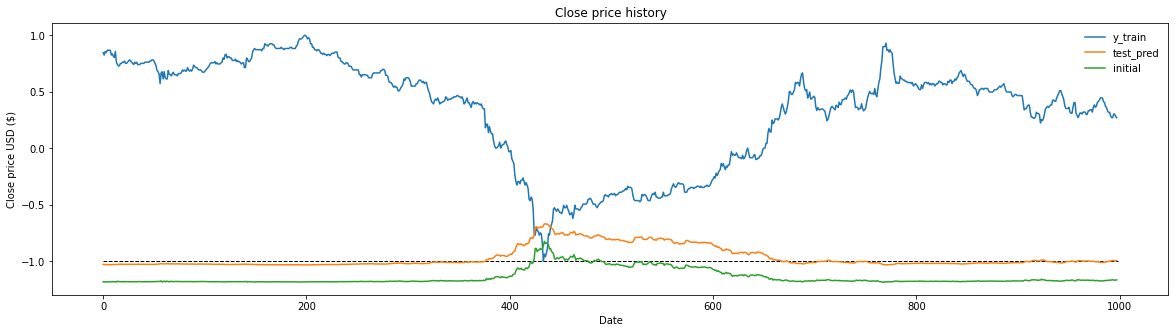

In [67]:
print('test_pred.shape =', test_pred.shape)

plt.figure(figsize=(20,5))
plt.title('Close price history')
plt.plot(data_reader.y_train, label = 'y_train')
plt.plot(test_pred, label = 'test_pred')
plt.plot(test_pred_initial, label = 'initial')
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.hlines(trader.threshold, 0, data_reader.y_train.size, lw = 1, linestyles='dashed')
plt.legend(frameon=False)
plt.show()

## Plotter osztály

In [68]:
# ------------------------------------------------------------------------------    # <-- Plotter Class

class Plotter():

  def __init__(self):
    pass


  def plot_generation_scatter(self, generation_holder):

    m = np.zeros((len(generation_holder), len(generation_holder[0])))
    # print(m.shape)

    for i in range(len(generation_holder)):
      for j in range(len(generation_holder[i])):
        m[i, j] = generation_holder[i][j]

    # --- kell csinálni egy [0, 1, 2, ..., 0, 1, 2, ..., 0, 1, 2] vektort is az lesz majd az x -tengely
    n = np.arange(1, len(generation_holder) + 1, 1)
    a = []
    for _ in range(len(generation_holder[0])):
      a.append(n)
    b = np.array(a)
    c = b.flatten()

    # --- ki kell teríteni a mátrixba rakott score-okat és kész is
    s = m.flatten(order='C')
    s = m.flatten(order='F')

    # --- kiszűrni a végelenűl nagyokat (amelyknél nem volt értlemezhető scorre)      # <-- new in v.014

    f = np.zeros(s.shape)                                                             # <-- nincs jobb ötletem, minthogy 0-ra cserélem őket
    f[s > -maxsize + 1] = s[s > -maxsize + 1]

    # --- plot
    # plt.scatter(c, s)
    
    return c, s, f

# ------------------------------------------------------------------------------

  def plot_results(self, _max=None, _show_mid = False):
    if(_show_mid == True):
      fig, (a0, a1, a2) = plt.subplots(1, 3, figsize=(18, 5))
    else:
      fig, (a0, a2) = plt.subplots(1, 2, figsize=(12, 5))
    
    _number_of_generation = len(best_score_holder)
    if (_max == None):
      _number_of_generation = _number_of_generation
    elif (_max > _number_of_generation):
      _number_of_generation = _number_of_generation
    elif (_max < _number_of_generation):
      _number_of_generation = _max

    _x_axis = np.arange(1, _number_of_generation+1, 1)
    a0.scatter(_x_axis, best_score_holder[:_number_of_generation])
    a0.set_ylabel('Means Square Error')
    a0.set_xlabel('Generation')

    c, s, f = self.plot_generation_scatter(generation_holder[:_number_of_generation])

    if(_show_mid == True):
      #a1.plot(generation_holder[:_number_of_generation])
      a1.plot(f[:_number_of_generation])
      
      a1.set_xlabel('Generation')

    # a2.scatter(c, s)    # <-- nem szűrt adatok
    a2.scatter(c, f)    # <-- szűrt adatok

    a2.set_xlabel('Generation')
    plt.show()


200
<class 'list'>
5
<class 'numpy.float64'>
0.3271767810026631
[0.3271767810026631, 0.20052770448546653, -0.021108179419513817, 0.052770448548812965, -9223372036854775807]


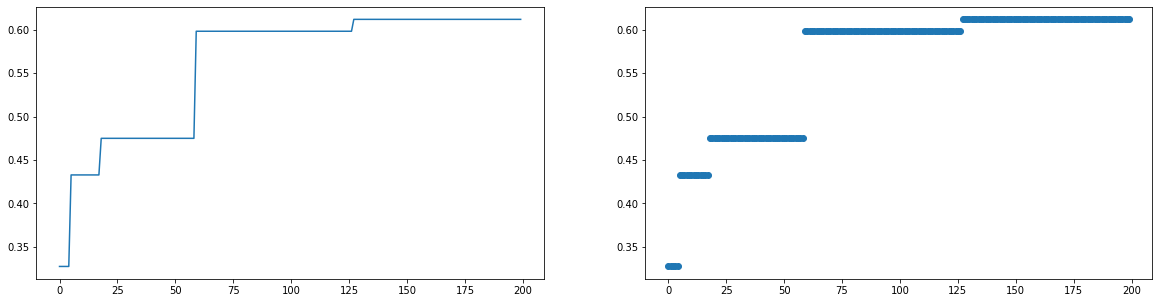

In [69]:
# ------------------------------------------------------------------------------    # <-- egy kis ellenőrzés mert úgy látom baj van.

# Ellenőrzés.
# Minden jó.


print(len(generation_holder))
print(type(generation_holder[0]))
print(len(generation_holder[0]))
print(type(generation_holder[0][0]))
print(generation_holder[0][0])
print(generation_holder[0])

tmp_best_scores_in_each_generation = []
for i in generation_holder:
  tmp_best_score = -sys.maxsize
  for score in i:
    if( score > tmp_best_score ):
      tmp_best_score = score
  tmp_best_scores_in_each_generation.append(tmp_best_score)


fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,5))
ax0.plot(tmp_best_scores_in_each_generation)
x_axis = np.arange(0, len(generation_holder), 1)
ax1.scatter(x_axis, tmp_best_scores_in_each_generation)
plt.show()

# Ellenőrzés.
# Minden jó.

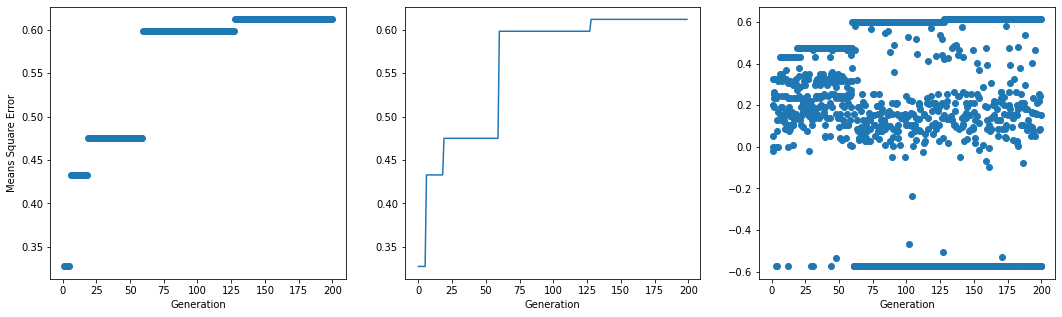

In [70]:
plotter = Plotter()

plotter.plot_results(2000, True)

## Evolver osztályt

- amiben azután propertyként tudok megadni változókat és irni rá settereket.
- legyen neki egy evaluate, vagy eval, vagy fit függvénye amit a mostani 'evaluate'

In [71]:
# ------------------------------------------------------------------------------    # <-- Evolver Class

import time
from enum import Enum
from sys import maxsize
from copy import deepcopy

class Backend(Enum):
  SCIKIT = 'scikit'
  KERAS = 'keras'

class NoneProperTypeError(Exception):
  print('Not Proper Type Error has been thrown.')
  pass

class Evaluator():
  """
  This is the Evaluator class which has to be instantiated for running sim.
  """

  def __init__(self, name: str, backend: Enum, arch: tuple, data_reader, nn):
    self.name = 'Evaluator'
    self.__id = 'id1'
    self.__backend = backend
    self.__arch = arch
    self.__print_generation = (False, 1)                                              # (True, 1) Minden generációra irja ki a best_individual_score-t
    self.__print_better = False                                                       # (False)   Ha talál jobb egyedet akkor írja ki
    self.data_reader = data_reader
    self.nn = nn

    self.__check(backend)
    self.__static()
  
  def run_evolution(self,
                    trader_threshold: float,
                    _generation: int,
                    _population: int,
                    _factor: float,
                    _keep_best: bool) -> dict:
    
    # --------------------------------------------------------------------------

    trader = Trader(threshold = trader_threshold, data_reader = self.data_reader)     # <-- create a Trader (0.0 just a random choise)
    randomer = Randomer(1)                                                            # <-- create a Randomer to controll the mutation
    randomer.debug = False
                                            
    generation = _generation                                                          # <----------- genetration (200)
    population = _population                                                          # <----------- population  (10)
    factor = _factor                                                                  # <----------- randomization factor (10)
    factor_intercept = _factor                                                        # <----------- randomization factor for intercepts_
    keep_best = _keep_best                                                            # <----------- keep_best (False)

    start_time = time.time()                                                          # <----------- mérjük meg, hogy mennyi ideig fut


    #
    np.random.seed(1)                                                                   # <-- (!)
    # ToDo: tesztelés után kivenni
    l1 = self.__arch[0]
    l2 = self.__arch[1]
    mlp = self.nn.init_nn(l1, l2)

    # mlp = init_nn(l1, l2)                                                           # <----------- itt adjuk át az MLP archtektúráját
    # ToDo: tesztelés után kivenni
    print('# Network intialization:')                                                 # ToDo: az init_nn függvényt át kell írnom, hogy tuple-t kapjon
    print('# First coefs')
    print('# ', mlp.coefs_[0][0])
    print('# First intercepts')
    print('# ', mlp.intercepts_[0])


    #
    coefs = deepcopy(mlp.coefs_)
    intercepts = deepcopy(mlp.intercepts_)
    backup_mlp = deepcopy(mlp)
    working_mlp = deepcopy(mlp)

    best_generation_score = -maxsize
    best_generation_solution = None

    generation_holder = []
    population_holder = []
    best_indiv_holder = []
    best_score_holder = []

    # --------------------------------------------------------------------------

    for i in range(generation):                                                       # <-- generation loop
      # print('generation {}'.format(i))
      # a legjobb egyed
      best_individual_solution = None
      best_individual_score = best_generation_score

      population_holder = []
      best_indiv_holder = []


      for j in range(population):                                                     # <-- population loop
        # print('individal {}'.format(j))
        if( keep_best == True ):
          if( j == 0 ):                               # Ha keep_best és első elem a populációban, akor tartsa meg a régi súlyt -> ne randomizáljon
            a = coefs
            b = intercepts
            pass
          else:
            a = randomer.randomize(coefs, factor=factor)                                                  # <-- randomizálja a súlyokat
            b = randomer.randomize_intercepts(intercepts, factor=factor_intercept)
        else:
          a = randomer.randomize(coefs, factor=factor)                                                    # <-- randomizálja a súlyokat
          b = randomer.randomize_intercepts(intercepts, factor=factor_intercept)
        # ----------------------------------------------------------------------        # <-- vége a súlymutációnak
        
        working_mlp.coefs_ = a                                                          # <-- assigne randomized coefs to the working_model
        working_mlp.intercepts_ = b

        pred = working_mlp.predict(self.data_reader.x_train)                                             # <-- számolja ki a becslést

        result = trader.calculator(pred)                                                # <-- mérje vissza a hibát, számolja ki a keresekedéseket

        if result['buy_count'] != 0:                                                    # <-- le kell kezelni azt ha nincs kötés
          score = result['gain']                                                        # <-- csak akkor kapja meg az értéket ha volt vétel
        else:
          score = -maxsize                                                              # <-- egyébkként -maxsize (-9223372036854775807)

        # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
        if( score > best_individual_score ):                                            # mivel maximalizálni akarunk ezért 'score > best_score'
          best_individual_score = score
          best_individual_solution = deepcopy(working_mlp)
          # print('new best_solution find individual = ', j)
          # print('i =', i, 'j =', j, '\tscore = ', score)
        
        # az éppen aktuális egyed score értékét tegyük el
        population_holder.append(score)
      
      # generációnként tároljuk le a legjobb egyed score érétkét
      best_score_holder.append(best_individual_score)

      # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
      generation_holder.append(population_holder)

      if( self.__print_generation[0] == True ):
          print('best_score in generation i = ', i, ' = ', best_individual_score)

      # ha a generáció legjobbja jobb mint a korábbi generáció legjobbja              # <-- ezt az értéket kell majd meghaladni a köv. gen.ben
      if ( best_individual_score > best_generation_score ):
        best_generation_score = best_individual_score
        best_generation_solution = deepcopy(best_individual_solution)
        found_better_in_generation = True
        # A generáció legjobbját tegyük le a coef változóba -> ezáltal a következő generációban ő lesz az ami alapján elindul a mutáció
        coefs = deepcopy(best_generation_solution.coefs_)
        intercepts = deepcopy(best_generation_solution.intercepts_)

        if ( self.__print_better == True):
          print('better score have found in generation i = ', i, ' = ', best_individual_score)


    # A globalisan legjobb megoldás alapján csináljuk meg a becslést
    # test_pred = best_generation_solution.predict(x_train)                               # <-- kiértékeléshez és vizualizációhoz

    # A backup_mlp alapján kiszámolhatom, hogy imlyen volt a becslés eredetileg
    # test_pred_initial = backup_mlp.predict(x_train)                                     # > ha később össze akarom vetni valamelyik mutációval

    # Ezek kellenek a plottoláshoz
    # generation_holder, best_score_holder, best_generation_solution

    # Mérjük meg, hogy mennyi ideig futott
    running_time = time.time() - start_time
    print('running_time = {:.2f}'.format(running_time))
    print('------------------------------------------')

    # Amit vissza akarok kapni
    # Futási idő:                       running_time
    # A legjobb teljesítmény mértéke:   best_generation_score
    # A többi a plottoláshoz kell.

    results = {}
    results['running_time'] = running_time
    results['best_generation_score'] = best_generation_score
    results['generation_holder'] = generation_holder
    results['population_holder'] = population_holder
    results['best_indiv_holder'] = best_indiv_holder
    results['best_score_holder'] = best_score_holder

    # return (running_time, best_generation_score, generation_holder, population_holder, best_indiv_holder, best_score_holder)

    return results


  # ----------------------------------------------------------------------------
  
  def __check(self, backend):
    if(isinstance(backend, Backend)):
      print('Backend is OK')
    else:
      print('Backend is not OK!')
  
  @classmethod
  def __static(self):
    print('Lefut a constructorban')

  def get_id(self) -> str:
    return self.__id

  def set_arch(self, arch: tuple):
    if type(arch) is tuple:
      self.__arch = arch
    else:
      raise NoneProperTypeError("Object is not set. Object is not is not 'Tuple' object.")

  def get_arch(self):
    return self.__arch

  def set_print_better(self, value: bool):
    if type(value) is bool:
      self.__print_better = value
    else:
      raise NoneProperTypeError("Object is not set. Object is not is not 'Boolean' object.")

  def set_print_generation(self, value: tuple):
    if type(value) is tuple:
      self.__print_generation = value
    else:
      raise NoneProperTypeError("Object is not set. Object is not is not 'Boolean' object.")
  
  def __str__(self):
        return 'Evaluator {0}, {1}, {2}, {3}'.format(self.name, self.__id, self.__backend, self.__arch)



Not Proper Type Error has been thrown.


## Program

In [72]:
class Potty():

  def __init__(self):
    print('init')
  
  def execute(self, param: str) -> dict:
    output = {}
    output['name'] = 'valami'
    output['param'] = param
    return output

potty = Potty()

dictionary = potty.execute(200)

print(len(dictionary))
print(dictionary['name'])
print(dictionary['param'])
print(dictionary.keys())
print(dictionary.values())


init
2
valami
200
dict_keys(['name', 'param'])
dict_values(['valami', 200])


In [73]:
# ------------------------------------------------------------------------------    # <-- Test The Program


exp_backend = Backend('scikit')
print(isinstance(exp_backend.SCIKIT, Backend))
evaluator = Evaluator('proba', backend=exp_backend, arch=(10,2), data_reader=data_reader, nn=nn)

evaluator.get_id()
evaluator.get_arch()
evaluator.set_arch((2,2))
evaluator.set_print_better(True)                                                    # <-- ! Vigyázat itt beállítottam
evaluator.set_print_generation((False, 1))                                          # <-- ! Vigyázat itt beállítottam
evaluator.get_arch()


# ------------------------------------------------------------------------------    # <-- Test The Program

# Population_size = 5
# Generation = 30

np.random.seed(1)

# ----------------

print(evaluator)

# exp_runtime, exp_fitness, exp_generation_holder, exp_population_holder, exp_best_indiv_holder, exp_best_score_holder = evaluator.run_evolution(trader_threshold=-1.0,
#                                                                                                                                                _generation=5,
#                                                                                                                                                _population=30,
#                                                                                                                                                _factor=10,
#                                                                                                                                                _keep_best=True)

exp_results = evaluator.run_evolution(trader_threshold=-1.0, _generation=5, _population=30, _factor=10, _keep_best=True)

print('exp_runtime = ', exp_results['running_time'])
print('exp_fitness = ', exp_results['best_generation_score'])



True
Backend is OK
Lefut a constructorban
Evaluator Evaluator, id1, Backend.SCIKIT, (2, 2)
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.5403693931397981
running_time = 0.43
------------------------------------------
exp_runtime =  0.43421411514282227
exp_fitness =  0.5403693931397981


## Expriment

Ahol azt vizsgálom, a populáció száma milyen hatással van a az eredményre.
Fontos, hogyha kevesebb populáció van, akkor azt tovább futtassuk.

In [74]:
# ------------------------------------------------------------------------------    # <-- Test The Program

# Population_size = 5
# Generation = 30

np.random.seed(1)

# ----------------

print(evaluator)

exp_results = evaluator.run_evolution(trader_threshold=-1.0, _generation=5, _population=30, _factor=10, _keep_best=True)

print('exp_runtime = ', exp_results['running_time'])
print('exp_fitness = ', exp_results['best_generation_score'])


# Ezt azért végzem el, hogy két egymást követő futás után ugyan azt az eredményt adja-e?

# Verifikálva - Igen


# ------------------------------------------------------------------------------

# ha nincs keep best akkor a 5 gen 30 pop = 150 hívás

# ha nincs keep best akkor a 6 gen 30 pop = 180 hívás

# ha van keep best akkor a 5 gen 30 pop = 145 hívás  --> vagyis mindíg annyival kevesebb ahány generáció van

# ha van keep best akkor a 6 gen 30 pop = 174 hívás  --> vagyis mindíg annyival kevesebb ahány generáció van


# ------------------------------------------------------------------------------



Evaluator Evaluator, id1, Backend.SCIKIT, (2, 2)
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.5403693931397981
running_time = 0.49
------------------------------------------
exp_runtime =  0.48575448989868164
exp_fitness =  0.5403693931397981


In [75]:
np.random.seed(1)

exp_results = evaluator.run_evolution(trader_threshold=-1.0, _generation=5, _population=30, _factor=10, _keep_best=True)

print('exp_runtime = ', exp_results['running_time'])
print('exp_fitness = ', exp_results['best_generation_score'])


__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.5403693931397981
running_time = 0.46
------------------------------------------
exp_runtime =  0.4588773250579834
exp_fitness =  0.5403693931397981


In [76]:

# Elleneörző vizsgálata

# A teljes szám no_keep_best esetén 200 * 6 -> 1200
# A teljes szám keep_best esetén 200 * 6 - 200 -> 100

_g = 10                             # _generation
_p = 6                              # _population
_kb = False                         # _keep_best
_f = 10                             # _factor
_d = False                          # _debug

np.random.seed(1)

# ----------------

exp_results_1 = evaluator.run_evolution(trader_threshold=-1.0, _generation=_g, _population=_p, _factor=_f, _keep_best=_kb)

print('exp_runtime = ', exp_results_1['running_time'])
print('exp_fitness = ', exp_results_1['best_generation_score'])


__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.3271767810026063
better score have found in generation i =  2  =  0.3271767810026631
better score have found in generation i =  3  =  0.37994722955144766
better score have found in generation i =  5  =  0.3799472295514761
better score have found in generation i =  7  =  0.4221635883905037
running_time = 0.21
------------------------------------------
exp_runtime =  0.20545721054077148
exp_fitness =  0.4221635883905037


In [77]:

# Ellenörző vizsgálat

# A teljes szám no_keep_best esetén 100 * 12 -> 1200
# A teljes szám keep_best esetén 100 * 12 - 100 -> 1100

_g = 10                             # _generation
_p = 12                             # _population
_kb = False                         # _keep_best
_f = 10                             # _factor
_d = False                          # _debug

np.random.seed(1)

# ----------------

exp_results_2 = evaluator.run_evolution(trader_threshold=-1.0, _generation=_g, _population=_p, _factor=_f, _keep_best=_kb)

print('exp_runtime = ', exp_results_2['running_time'])
print('exp_fitness = ', exp_results_2['best_generation_score'])


__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.3271767810026063
better score have found in generation i =  1  =  0.3271767810026631
better score have found in generation i =  3  =  0.37994722955144766
better score have found in generation i =  5  =  0.43271767810028905
running_time = 0.38
------------------------------------------
exp_runtime =  0.38213348388671875
exp_fitness =  0.43271767810028905


In [78]:
# Ellenörző vizsgálat

# A teljes szám no_keep_best esetén 50 * 24 -> 1200
# A teljes szám keep_best esetén 50 * 24 - 50 -> 1150

_g = 10                             # _generation
_p = 24                             # _population
_kb = False                         # _keep_best
_f = 10                             # _factor
_d = False                          # _debug

np.random.seed(1)

# ----------------

exp_results_3 = evaluator.run_evolution(trader_threshold=-1.0, _generation=_g, _population=_p, _factor=_f, _keep_best=_kb)

print('exp_runtime = ', exp_results_3['running_time'])
print('exp_fitness = ', exp_results_3['best_generation_score'])


__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.5403693931397981
running_time = 0.69
------------------------------------------
exp_runtime =  0.6949634552001953
exp_fitness =  0.5403693931397981


In [79]:
# Ellenörző vizsgálat

# A teljes szám no_keep_best esetén 25 * 48 -> 1200
# A teljes szám keep_best esetén 25 * 48 - 25 -> 1175

_g = 10                             # _generation
_p = 48                             # _population
_kb = False                         # _keep_best
_f = 10                             # _factor
_d = False                          # _debug

np.random.seed(1)

# ----------------

exp_results_4 = evaluator.run_evolution(trader_threshold=-1.0, _generation=_g, _population=_p, _factor=_f, _keep_best=_kb)

print('exp_runtime = ', exp_results_4['running_time'])
print('exp_fitness = ', exp_results_4['best_generation_score'])


__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.5403693931397981
better score have found in generation i =  8  =  0.5825857519788258
running_time = 1.42
------------------------------------------
exp_runtime =  1.417745590209961
exp_fitness =  0.5825857519788258


In [80]:
def plot_four():
  fig, (a0, a1) = plt.subplots(1, 2, figsize=(12, 5))

  _number_of_generation_exp1 = len(exp_results_1['best_score_holder'])
  _number_of_generation_exp2 = len(exp_results_2['best_score_holder'])
  _number_of_generation_exp3 = len(exp_results_3['best_score_holder'])
  _number_of_generation_exp4 = len(exp_results_4['best_score_holder'])

  _x_axis_exp1 = np.arange(1, _number_of_generation_exp1+1, 1)
  _x_axis_exp2 = np.arange(1, _number_of_generation_exp2+1, 1)
  _x_axis_exp3 = np.arange(1, _number_of_generation_exp3+1, 1)
  _x_axis_exp4  = np.arange(1, _number_of_generation_exp4 +1, 1)

  a0.scatter(_x_axis_exp1, exp_results_1['best_score_holder'][:_number_of_generation_exp1], label='population = 5, gen = 5000')
  a0.scatter(_x_axis_exp2, exp_results_2['best_score_holder'][:_number_of_generation_exp2], label='population = 10, gen = 2500')
  a0.scatter(_x_axis_exp3, exp_results_3['best_score_holder'][:_number_of_generation_exp3], label='population = 20, gen = 1250')
  a0.scatter(_x_axis_exp4, exp_results_4['best_score_holder'][:_number_of_generation_exp4], label='population = 40, gen = 625')

  a0.set_ylabel('Fitness')
  a0.set_xlabel('Generation')
  a0.legend(frameon=False)
  a0.set_title('Best ind. with cur. population size')

  point_size=0.9
  point_alha=0.9

  c, s, f_5_800 = plotter.plot_generation_scatter(exp_results_1['generation_holder'][:_number_of_generation_exp1])
  a1.scatter(c, f_5_800, alpha=point_alha, facecolors='C0', edgecolors='C0', s=point_size)

  c, s, f_10_400 = plotter.plot_generation_scatter(exp_results_2['generation_holder'][:_number_of_generation_exp2])
  a1.scatter(c, f_10_400, alpha=point_alha, facecolors='C1', edgecolors='C1', s=point_size)

  c, s, f_20_200 = plotter.plot_generation_scatter(exp_results_3['generation_holder'][:_number_of_generation_exp3])
  a1.scatter(c, f_20_200, alpha=point_alha, facecolors='C3', edgecolors='C2', s=point_size)

  c, s, f_40_100 = plotter.plot_generation_scatter(exp_results_4['generation_holder'][:_number_of_generation_exp4])
  a1.scatter(c, f_40_100, alpha=point_alha, facecolors='C3', edgecolors='C3', s=point_size)

  a1.set_xlabel('Generation')
  a1.set_title('All individuals in Generation')
  plt.show()


  print(exp_results_1['best_score_holder'][-1])
  print(exp_results_2['best_score_holder'][-1])
  print(exp_results_3['best_score_holder'][-1])
  print(exp_results_4['best_score_holder'][-1])

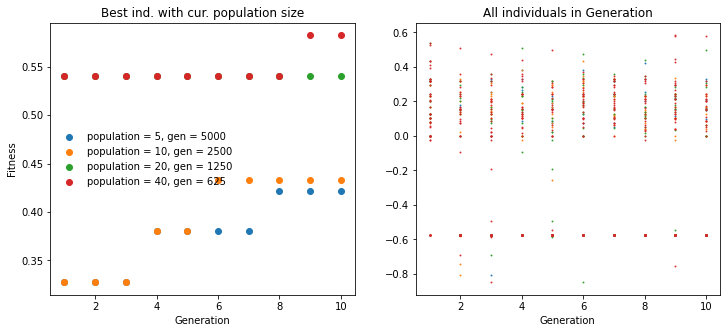

0.4221635883905037
0.43271767810028905
0.5403693931397981
0.5825857519788258


In [81]:
plot_four()

## Baz

Vegyük le az első 100 esetet mindegyikből feszítsük ki és nézzük meg hogy milyen értéket adott

In [82]:
len(exp_results_4['generation_holder'])
len(exp_results_4['generation_holder'][0])
a1 = np.array(exp_results_4['generation_holder'])
a1.shape
b1 = a1.flatten()
b1.shape

(480,)

(10, 6) (60,)
(10, 12) (120,)
(10, 24) (240,)
(10, 48) (480,)
(60,)


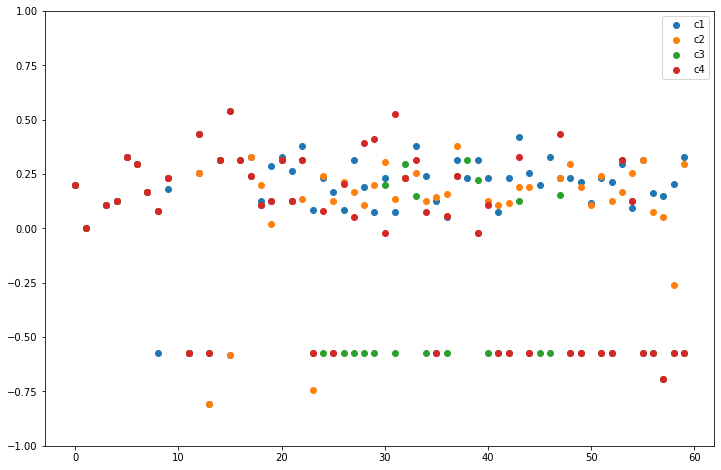

In [83]:

a1 = np.array(exp_results_1['generation_holder'])
b1 = a1.flatten()
a2 = np.array(exp_results_2['generation_holder'])
b2 = a2.flatten()
a3 = np.array(exp_results_3['generation_holder'])
b3 = a3.flatten()
a4 = np.array(exp_results_4['generation_holder'])
b4 = a4.flatten()
print(a1.shape, b1.shape)
print(a2.shape, b2.shape)
print(a3.shape, b3.shape)
print(a4.shape, b4.shape)

size = 60
line = np.arange(0, size, 1)
print(line.shape)

c1 = b1[:size]
c2 = b2[:size]
c3 = b3[:size]
c4 = b4[:size]
plt.figure(figsize=(12,8))
plt.scatter(line, c1, label='c1')
plt.scatter(line, c2, label='c2')
plt.scatter(line, c3, label='c3')
plt.scatter(line, c4, label='c4')
plt.ylim((-1,1))
plt.legend()
plt.show()

## Fent

A 7.ik lépésben a c1 (pop size = 6) elmegy és új értéket vesz fel
A 13.ik lépésben a c2 (pop size = 12) elmegy és új értéket vesz fel
A 25.ik lépseben a c3 (pop size = 24) elmegy és új értéket vesz fel

Érdekes módon akkor válnak szét ezek az értékek amikor meghaladják a populációs mérétküket. A kérdés, hogy miért?

Rossz helyen írom ki őket?
Elvileg mindíg ugyan azokat a súlyokat tesztelik.

Lehet, hogy akkor van a hiba amikor beírom a teljesítményűket letároló listába?

Vagy korábban!

Hiszen a mutáció úgy néz ki, hogy best értékhez ad hozzá egy véletlen számot.
És a best érték mindíg akkor lép érvénybe amikor generáció váltás van.

MEGVAN A MEGOLDÁS!

Itt volt a hiba.

A best értékhez adja hozzá ugyan azokat a véletlen számokat.
De ami 6 egyedes, az a hetedik lépésben megkaja meg a best értéket.
És onnantól ugyan az a véletlen szám lesz hozzáadva mint 12 egyedes (7.ik egyedéhez) csak annak egy régi best értéke van. Ezért a kettő ugyan azt az új véletlen számot kapja csak az egyik még a régihez adja hozzá, a másik meg már egy újhoz.

Ez a probléma akkor nem jelentkezett volna, hogyha egy individum generáción belül elér egy best értéket akkor felülcsapja az egész populációra vonakozó best értéket.

Tehát jól csináltam csak nem értettem a működést amit pedig én írtam.

## Ez ugyanakkor felvet egy fontos kérdést. Vagy mégsem?

Ha szekvenciálisan egy gépen futtatom, akkor amint lefut egy indivídum tudni fogjuk, hogy jobb eredményt ért-e el mint a generáció addigi legjobbja. Ezért flül tudjuk csapni a paramétereivel a gént és a következő egyednek már ez alapján kéne mutálódnia. Ez azonban azt jelentené, hogy minden egyed aki megdönti a korábbi rekordot azonnal szülővé válik és a következő egyedet már belőle klónozzuk, majd mutáljuk.

A klasszikus EA-ban viszont ez nem így működik.<br>
Ott végig megyünk az összes egyeden a populációban és csak a végén nézzük meg, hogy ki volt a legjobb. Majd ez alapján áll elő az új populáció, a legjobb alapján.

Ezt az esetetet könnyen lehet párhuzamosítani.<br>
Viszont ha az van amit korábban írtam, hogy bármelyik egyed elér egy jobb eredményt mint bármely korábbi volt, akkor értesítenie kéne a többi párhuzamosan futót és megkérdezni, hogy mi a ti eredményetek, hogy felül tudjam írni, be tudjam írni a rekordot. Szóval ez az eset **nem párhuzamosítható**.

Peidg korábban tök véletlenül így írtam meg a program és ezt hibának véltam. Az is a klasszikus EA értelmében.

Ugyhogy lehet, hogy mégsem írtam akkora hülyeséget a cikkben, hogy a nagyobb populáció szám - ha klasszikus és párhuzamosítható EA-t vesszük - esetében **nem biztos, hogy jobb eredményre vezet a nagyobb populáció szám** mert **később mutálódnak** vagy ha úgy jobban tetszik, **később tudják átadni a mutációs előnyt** kevesebb *reprodukció* van.



## A nagy elemszámú populációs vizsgálatok. (Teszt)

Most sokkal nagyobb populáció számmal próbálom ki ugyan azokat a kísérleteket amiket a cikkbe írtam.

In [84]:
# ------------------------------------------------------------------------------


experiment_popsize = {'exp1': ({"pop_size": 30}, 1), 'exp2': ({"pop_size": 60}, 2)}   # <-- set experiments

print(len(experiment_popsize))
print(experiment_popsize.keys())

exp_results = []

for i in experiment_popsize.keys():                                                   # <-- iterate through experiments
  print(i)
  exp_population_size = experiment_popsize.get(i)[0].get('pop_size')
  exp_id = experiment_popsize.get(i)[1]
  print(exp_population_size)


  # ---                                                                               # <-- here is the experiment itself

  # Population_size = __                                                              # <-- gets from 'pop_size'
  # Generation = 10

  # --- seed
  np.random.seed(1)

  # --- run EA
  
  given_exp_results = evaluator.run_evolution(trader_threshold=-1.0,
                                        _generation=10,
                                        _population=exp_population_size,
                                        _keep_best=True,
                                        _factor=10)
  
  exp_result = [given_exp_results['running_time'],
                given_exp_results['best_generation_score'],
                given_exp_results['generation_holder'],
                given_exp_results['population_holder'],
                given_exp_results['best_indiv_holder'],
                given_exp_results['best_score_holder'],
                exp_id,
                exp_population_size]

  exp_results.append(exp_result)


2
dict_keys(['exp1', 'exp2'])
exp1
30
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.5403693931397981
running_time = 1.76
------------------------------------------
exp2
60
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.5403693931397981
better score have found in generation i =  6  =  0.5825857519788258
better score have found in generation i =  8  =  0.7092348284960224
running_time = 1.98
------------------------------------------


In [85]:
def plot_exp(_exp_results):
  fig, (a0, a1) = plt.subplots(1, 2, figsize=(12, 5))

  for exp in _exp_results:
    _number_of_generation_exp = len(exp[5])

    _x_axis_exp = np.arange(1, _number_of_generation_exp+1, 1)

    a0.scatter(_x_axis_exp, exp[5][:_number_of_generation_exp], label='population = ' + str(exp[7]) + ', gen = 5000')

    a0.set_ylabel('Fitness')
    a0.set_xlabel('Generation')
    a0.legend(frameon=False)
    a0.set_title('Best ind. with cur. population size')

    point_size=1.9
    point_alha=0.9

    c, s, f = plotter.plot_generation_scatter(exp[2][:_number_of_generation_exp])
    a1.scatter(c, f, alpha=point_alha, s=point_size)

    a1.set_xlabel('Generation')
    a1.set_title('All individuals in Generation')
    
    print('fitness of exp{} = {}'.format(exp[6], exp[1]))

  plt.show()


fitness of exp1 = 0.5403693931397981
fitness of exp2 = 0.7092348284960224


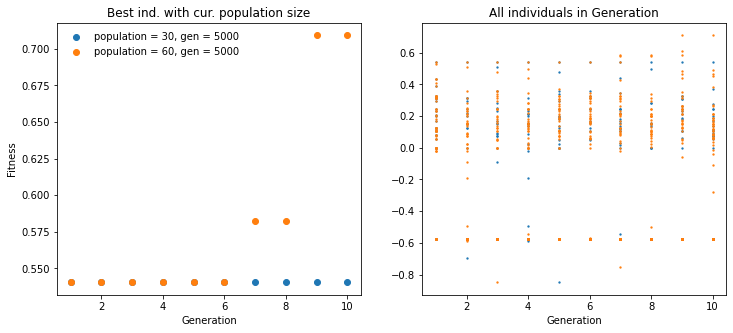

In [86]:
plot_exp(exp_results)

## A nagy elemszámú populációs vizsgálatok. (Ráhangolódás)

Most sokkal nagyobb populáció számmal próbálom ki ugyan azokat a kísérleteket amiket a cikkbe írtam.

In [89]:
# ------------------------------------------------------------------------------


from numpy.random import RandomState

prng = RandomState(1234567890)

experiment_popsize = {'exp1': ({'pop_size': 10, 'gen_size': 14}, 1),
                      'exp2': ({'pop_size': 20, 'gen_size': 10}, 2),
                      'exp3': ({'pop_size': 30, 'gen_size': 10}, 3)}   # <-- set experiments

print(len(experiment_popsize))
print(experiment_popsize.keys())

exp_results = []

for i in experiment_popsize.keys():                                                   # <-- iterate through experiments
  print(i)
  exp_population_size = experiment_popsize.get(i)[0].get('pop_size')
  exp_generation_size = experiment_popsize.get(i)[0].get('gen_size')
  exp_id = experiment_popsize.get(i)[1]
  print(exp_population_size)


  # ---                                                                               # <-- here is the experiment itself

  # Population_size = __                                                              # <-- gets from 'pop_size'
  # Generation = __                                                                   # <-- gets from 'gen_size'

  # --- seed
  np.random.seed(1)

  # --- run EA
  
  given_exp_results = evaluator.run_evolution(trader_threshold=-1.0,
                                        _generation=exp_generation_size,
                                        _population=exp_population_size,
                                        _keep_best=True,
                                        _factor=10)
  
  exp_result = [given_exp_results['running_time'],
                given_exp_results['best_generation_score'],
                given_exp_results['generation_holder'],
                given_exp_results['population_holder'],
                given_exp_results['best_indiv_holder'],
                given_exp_results['best_score_holder'],
                exp_id,
                exp_population_size]

  exp_results.append(exp_result)


3
dict_keys(['exp1', 'exp2', 'exp3'])
exp1
10
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.3271767810026631
better score have found in generation i =  1  =  0.5403693931397981
running_time = 0.76
------------------------------------------
exp2
20
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.5403693931397981
running_time = 1.08
------------------------------------------
exp3
30
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.5403693931397981
running_time = 1.57
------------------------------------------


fitness of exp1 = 0.5403693931397981
fitness of exp2 = 0.5403693931397981
fitness of exp3 = 0.5403693931397981


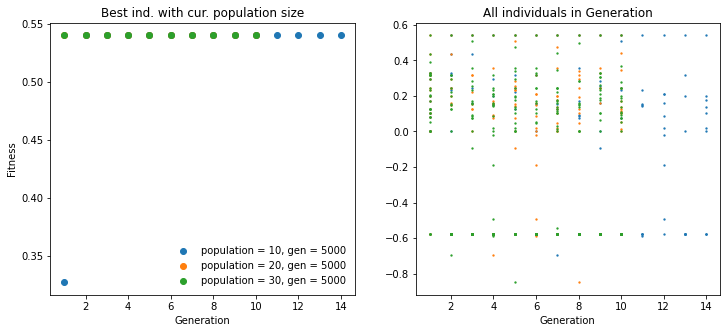

In [90]:
plot_exp(exp_results)

## A nagy elemszámú populációs vizsgálatok. (Valós)

Most sokkal nagyobb populáció számmal próbálom ki ugyan azokat a kísérleteket amiket a cikkbe írtam.

In [91]:
# ------------------------------------------------------------------------------


from numpy.random import RandomState

prng = RandomState(1234567890)

experiment_popsize = {'exp1': ({'pop_size': 10, 'gen_size': 100}, 1),
                      'exp2': ({'pop_size': 25, 'gen_size': 100}, 2),
                      'exp3': ({'pop_size': 50, 'gen_size': 100}, 3),
                      'exp4': ({'pop_size': 99, 'gen_size': 100}, 4)}   # <-- set experiments

print(len(experiment_popsize))
print(experiment_popsize.keys())

exp_results = []

for i in experiment_popsize.keys():                                                   # <-- iterate through experiments
  print(i)
  exp_population_size = experiment_popsize.get(i)[0].get('pop_size')
  exp_generation_size = experiment_popsize.get(i)[0].get('gen_size')
  exp_id = experiment_popsize.get(i)[1]
  print(exp_population_size)


  # ---                                                                               # <-- here is the experiment itself

  # Population_size = __                                                              # <-- gets from 'pop_size'
  # Generation = __

  # --- seed
  np.random.seed(1)

  # --- run EA
  
  given_exp_results = evaluator.run_evolution(trader_threshold=-1.0,
                                        _generation=exp_generation_size,
                                        _population=exp_population_size,
                                        _keep_best=True,
                                        _factor=10)
  
  exp_result = [given_exp_results['running_time'],
                given_exp_results['best_generation_score'],
                given_exp_results['generation_holder'],
                given_exp_results['population_holder'],
                given_exp_results['best_indiv_holder'],
                given_exp_results['best_score_holder'],
                exp_id,
                exp_population_size]

  exp_results.append(exp_result)


4
dict_keys(['exp1', 'exp2', 'exp3', 'exp4'])
exp1
10
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.3271767810026631
better score have found in generation i =  1  =  0.5403693931397981
better score have found in generation i =  42  =  0.5804749340369142
better score have found in generation i =  49  =  0.5857519788918069
better score have found in generation i =  74  =  0.6670184696569095
running_time = 5.43
------------------------------------------
exp2
25
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.5403693931397981
better score have found in generation i =  16  =  0.5825857519788258
better score have found in generation i =  20  =  0.6121372031662418
better score have found in generation i =  32  =  0.6459102902

fitness of exp1 = 0.6670184696569095
fitness of exp2 = 0.7546174142479742
fitness of exp3 = 0.7915567282321092
fitness of exp4 = 0.7915567282321092


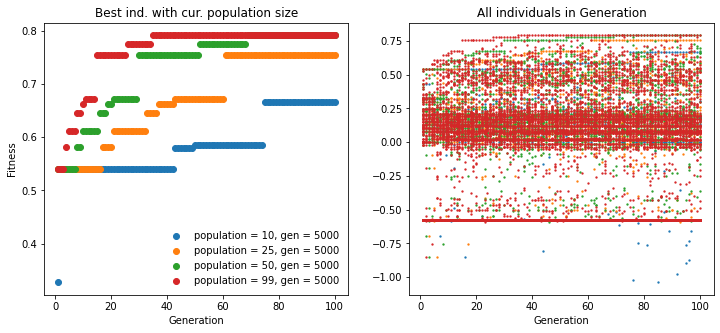

In [92]:
plot_exp(exp_results)

## Experiment

Ahol a mutáció mértékének a tanulásra gyakorolt hatását vizsgálom meg.

In [93]:

rt_holder = []
g_holder = []
p_holder = []
bi_holder = []
bs_holder = []

exp_generation_size = 500
exp_population_size = 10
exp_keep_best = True

factors = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]
for i, v in enumerate(factors):
  print(i, v)

  # --- run EA
  
  given_exp_results = evaluator.run_evolution(trader_threshold=-1.0,
                                        _generation=exp_generation_size,
                                        _population=exp_population_size,
                                        _keep_best=exp_keep_best,
                                        _factor=v)

  rt_holder.append(given_exp_results['running_time'])
  g_holder.append(given_exp_results['generation_holder'])
  p_holder.append(given_exp_results['population_holder'])
  bi_holder.append(given_exp_results['best_indiv_holder'])
  bs_holder.append(given_exp_results['best_score_holder'])


0 1
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.3271767810026631
better score have found in generation i =  4  =  0.47810026385215565
better score have found in generation i =  11  =  0.5139841688653632
better score have found in generation i =  22  =  0.5963060686015922
better score have found in generation i =  43  =  0.7810026385223523
better score have found in generation i =  46  =  0.7915567282321376
better score have found in generation i =  47  =  0.812664907651623
running_time = 19.60
------------------------------------------
1 2
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
better score have found in generation i =  0  =  0.3271767810026631
better score have found in generation i =  1  =  0.3377308707123916
better score have found in generation i =  2  =

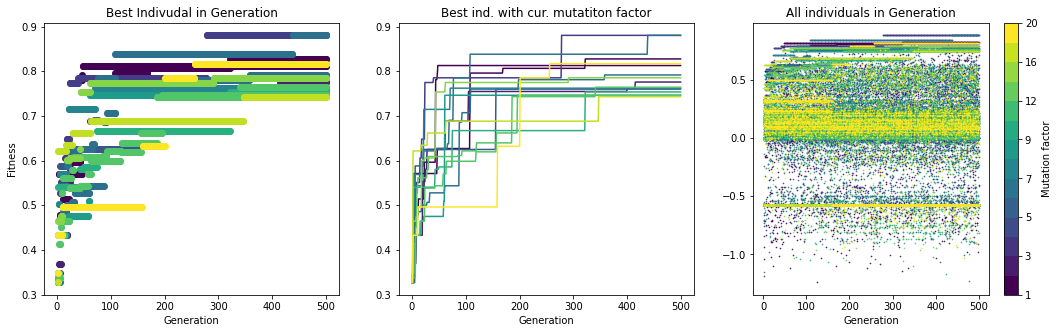

In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 12)
# print(viridis(0))

color_factor = 1/len(factors)

fig, (a0, a1, a2) = plt.subplots(1, 3, figsize=(18, 5))

for i, v in enumerate(factors):
  best_score_holder = bs_holder[i]
  generation_holder = g_holder[i]

  _number_of_generation = len(best_score_holder)

  _x_axis = np.arange(1, _number_of_generation+1, 1)

  _color = viridis(i * color_factor)

  a0.scatter(_x_axis, best_score_holder[:_number_of_generation], color=_color, label='factor = ' + str(v))

  a0.set_ylabel('Fitness')
  a0.set_xlabel('Generation')
  a0.set_title('Best Indivudal in Generation')
  # a0.legend(frameon=False)

  point_size=0.4
  point_alha=0.9

  c, s, f = plotter.plot_generation_scatter(generation_holder[:_number_of_generation])

  a1.plot(f[:_number_of_generation], color = _color)  
  a1.set_xlabel('Generation')
  a1.set_title('Best ind. with cur. mutatiton factor')
  
  a2.scatter(c, f, alpha=point_alha, s=point_size, color = _color, label=str(v))

  a2.set_xlabel('Generation')
  a2.set_title('All individuals in Generation')

cmap = mpl.cm.viridis
# bounds = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
bounds = factors
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             orientation='vertical',
             label='Mutation factor');

plt.show()

## Ha teljesen üres kimenetet akarok

Elég a már meglévő Evolveren átállítani egy értéket

In [96]:

evaluator.set_print_better(False)


In [97]:
rt_holder = []
g_holder = []
p_holder = []
bi_holder = []
bs_holder = []

exp_generation_size = 500
exp_population_size = 10
exp_keep_best = True

factors = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]
for i, v in enumerate(factors):
  print(i, v)

  # --- run EA
  
  given_exp_results = evaluator.run_evolution(trader_threshold=-1.0,
                                        _generation=exp_generation_size,
                                        _population=exp_population_size,
                                        _keep_best=exp_keep_best,
                                        _factor=v)

  rt_holder.append(given_exp_results['running_time'])
  g_holder.append(given_exp_results['generation_holder'])
  p_holder.append(given_exp_results['population_holder'])
  bi_holder.append(given_exp_results['best_indiv_holder'])
  bs_holder.append(given_exp_results['best_score_holder'])


0 1
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
running_time = 16.60
------------------------------------------
1 2
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
running_time = 15.52
------------------------------------------
2 3
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
running_time = 14.16
------------------------------------------
3 4
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
running_time = 14.09
------------------------------------------
4 5
__init__ Trader
# Network intialization:
# First coefs
#  [-0.20325375  0.53968259]
# First intercepts
#  [-0.86526782 -0.99856243]
running_time = 14.04
------------------------------------------


## Visualise net - Best Solution

In [98]:
!pip install palette

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for palette: filename=palette-0.2-py3-none-any.whl size=5982 sha256=9d8d4c52902865511deffdde80d102c5b405754ebd93d856f2bff9e4587eaf1b
  Stored in directory: /root/.cache/pip/wheels/38/d7/63/4b6a4303bfe17eeb00471b838834a486c2aa36e395bb2242b6
Successfully built palette


[2 2 2 1]


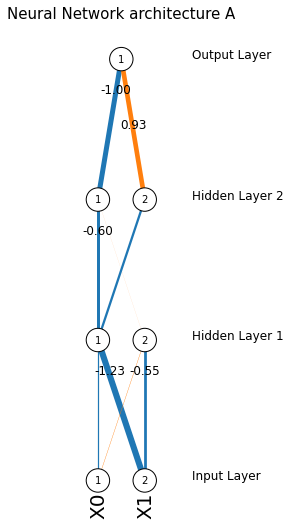

In [99]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

net = best_generation_solution                                                      # <- a best_solution

num_input_varialbe = ['X']

num_input_varialbe = ['X'+str(i) for i in range(30)]

num_input_varialbe = ['X'+str(i) for i in range(net.coefs_[0].shape[0])]            # <- mlp.coefs_[0].shape[0] a bemenetek száma



# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, net.coefs_, num_input_varialbe)
network.draw()

## Visualise net - Initial ('Empty') Solution

[2 2 2 1]


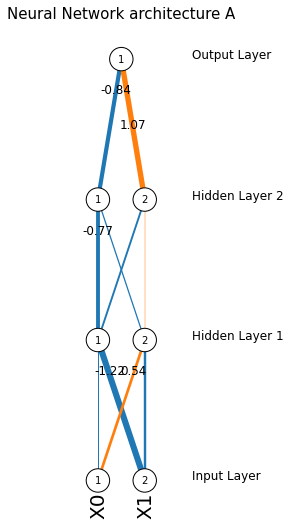

In [100]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

net = backup_mlp                                                                    # <- a kiinduló megoldást vesszük sorra

num_input_varialbe = ['X']

num_input_varialbe = ['X'+str(i) for i in range(30)]

num_input_varialbe = ['X'+str(i) for i in range(net.coefs_[0].shape[0])]            # <- mlp.coefs_[0].shape[0] a bemenetek száma



# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, net.coefs_, num_input_varialbe)
network.draw()


```
# JoDeMiro
```
